<a href="https://colab.research.google.com/github/MohamadSaifulRizal/Mohamad-Saiful-Rizal_362358302005_TRPL-3A_SPK-Final/blob/main/Final_Projek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Mohamad Saiful Rizal

Nim: 362358302005

Kelas: TRPL 2A

Judul:

Blok 1

tahap ini mengumpulkan data rumah dari dua file Excel, membersihkan format kolom agar seragam, dan menghilangkan nilai-nilai kosong. tahap ini sedang menyiapkan "bahan baku" data agar siap untuk dianalisis dengan K-means di tahap selanjutnya.

Prosesnya dimulai dengan meload kedua dataset rumah. Data dari file pertama (DATA RUMAH.xlsx) dan file kedua (HARGA RUMAH JAKSEL.xlsx) memiliki nama kolom yang berbeda-beda. Misalnya, satu file punya kolom HARGA sementara konsistensi penamaan diperlukan agar mudah diproses. Oleh karena itu, kita melakukan standarisasi nama kolom (rename), menambahkan kolom Kota untuk identitas lokasi, dan mengubah nilai kategori seperti "ADA" atau "TIDAK ADA" di kolom garasi menjadi angka 1 dan 0. Setelah itu, kedua dataset digabungkan menjadi satu (df_all_houses), dan semua nilai kosong atau hilang di kolom numerik diisi dengan nilai tengah (median) dari kolom tersebut agar tidak ada data yang terbuang.

Output yang diharapkan: Satu dataframe bersih bernama df_all_houses dengan 2011 baris rumah dan 8 kolom standar (Harga, KT, KM, GRS, Kota, NAMA RUMAH, LT, LB), tanpa nilai kosong, siap untuk diproses K-means.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

df_rumah1 = pd.read_excel('/content/DATA RUMAH.xlsx')
df_rumah2 = pd.read_excel('/content/HARGA RUMAH JAKSEL.xlsx', header=1)

df_rumah1.rename(columns={'HARGA': 'Harga'}, inplace=True)
df_rumah1['Kota'] = 'Jakarta Selatan'

df_rumah2.rename(columns={
    'HARGA': 'Harga',
    'JKT': 'KT',
    'JKM': 'KM',
    'KOTA': 'Kota'
}, inplace=True)

df_rumah2['GRS'] = df_rumah2['GRS'].replace({'ADA': 1, 'TIDAK ADA': 0, '-': 0}).fillna(0).astype(int)

df_rumah1_cleaned = df_rumah1[['Harga', 'KT', 'KM', 'GRS', 'Kota', 'NAMA RUMAH', 'LT', 'LB']]
df_rumah2_cleaned = df_rumah2[['Harga', 'KT', 'KM', 'GRS', 'Kota', 'LT', 'LB']].copy()
df_rumah2_cleaned['NAMA RUMAH'] = np.nan

df_all_houses = pd.concat([df_rumah1_cleaned, df_rumah2_cleaned], ignore_index=True)

df_all_houses['NAMA RUMAH'] = df_all_houses['NAMA RUMAH'].fillna('Unknown')
numerical_cols = ['Harga', 'KT', 'KM', 'LT', 'LB', 'GRS']

for col in numerical_cols:
    df_all_houses[col] = pd.to_numeric(df_all_houses[col], errors='coerce')
    if df_all_houses[col].isnull().any():
        median_val = df_all_houses[col].median()
        df_all_houses[col] = df_all_houses[col].fillna(median_val)
    df_all_houses[col] = df_all_houses[col].astype(int)

print("Data berhasil dimuat dan dibersihkan")
print(f"Total rumah: {len(df_all_houses)}")
print("\n")
print(df_all_houses.head())


Data berhasil dimuat dan dibersihkan
Total rumah: 2011


        Harga  KT  KM  GRS             Kota  \
0  3800000000   3   3    0  Jakarta Selatan   
1  4600000000   4   3    2  Jakarta Selatan   
2  3000000000   4   4    4  Jakarta Selatan   
3   430000000   2   2    0  Jakarta Selatan   
4  9000000000   6   5    3  Jakarta Selatan   

                                          NAMA RUMAH   LT   LB  
0  Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...  220  220  
1  Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...  137  180  
2  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...  250  267  
3           Rumah Baru Tebet, Tebet, Jakarta Selatan   25   40  
4  Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...  355  400  


Blok 2

Tahap ini mengubah skala data agar semua fitur memiliki bobot yang sama dalam perhitungan K-means. Ini penting karena dalam dataset, harga rumah nilainya jauh lebih besar dibanding luas tanah jika tidak menyamakan skala, K-means akan terlalu fokus pada harga dan mengabaikan luas tanah.

Kita memilih tiga fitur untuk clustering: Harga, Luas Tanah (LT), dan Luas Bangunan (LB). Kemudian kita menggunakan teknik bernama StandardScaler yang mengubah semua nilai sehingga rata-ratanya 0 dan simpangan bakunya 1 (standar deviasi 1). Dengan cara ini, baik harga senilai puluhan juta maupun luas bangunan senilai ratusan meter, semuanya berada dalam skala yang sama.

Output yang diharapkan: Data yang sudah di-standardisasi dalam bentuk array bernama X_scaled, di mana semua fitur (Harga, LT, LB) memiliki skala yang seimbang dan siap untuk digunakan oleh algoritma K-means.

In [2]:
clustering_features = ['Harga', 'LT', 'LB']
X = df_all_houses[clustering_features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=clustering_features)

print("Data berhasil di-standardisasi")
print(f"Shape data: {X_scaled_df.shape}")
print("\nStatistik data terstandarisasi:")
print(X_scaled_df.describe())


Data berhasil di-standardisasi
Shape data: (2011, 3)

Statistik data terstandarisasi:
              Harga            LT            LB
count  2.011000e+03  2.011000e+03  2.011000e+03
mean  -5.653249e-17 -2.826625e-17  5.653249e-17
std    1.000249e+00  1.000249e+00  1.000249e+00
min   -7.414474e-01 -8.564722e-01 -9.563502e-01
25%   -5.226866e-01 -5.732040e-01 -5.163751e-01
50%   -3.082151e-01 -3.207515e-01 -2.267712e-01
75%    1.820053e-01  2.102282e-01  3.301592e-01
max    1.455159e+01  1.518670e+01  2.678436e+01


Blok 3

Tahap ini bertujuan menemukan jumlah cluster yang paling baik untuk membagi data rumah. Istilah "cluster" di sini berarti kelompok kita ingin tahu berapa banyak kelompok rumah yang sebaiknya dibuat berdasarkan karakteristik harga dan ukurannya.

Elbow Method bekerja dengan cara mencoba membuat cluster dengan jumlah berbeda (K = 2, 3, 4, ... hingga 10), dan untuk setiap K, kita menghitung "inertia" (ukuran berapa jauh semua rumah dari pusat klusternya). Semakin banyak cluster, inertia akan semakin kecil (karena lebih banyak kelompok kecil). Kita mencari titik "elbow" atau siku yaitu titik di mana penambahan cluster baru tidak lagi mengurangi inertia secara signifikan. Titik ini menunjukkan K yang paling efisien dan praktis.

Output yang diharapkan: Tabel yang menunjukkan nilai inertia untuk setiap K (2 hingga 10), dan dari sini kita bisa melihat K mana yang paling optimal (biasanya K = 3 atau 4 untuk dataset rumah ini).

In [3]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

elbow_data = pd.DataFrame({
    'K': list(K_range),
    'Inertia': inertias
})

print("Elbow Method Results:")
print(elbow_data)


Elbow Method Results:
    K      Inertia
0   2  3758.630101
1   3  2530.818127
2   4  1819.386025
3   5  1454.865643
4   6  1242.910315
5   7  1083.743433
6   8   955.228005
7   9   853.863872
8  10   780.781905


Blok 4

Setelah menemukan K optimal dari Elbow Method, tahap ini menjalankan algoritma K-means dengan K tersebut pada seluruh data. K-means bekerja dengan cara membagi data menjadi K kelompok (cluster) sehingga rumah-rumah yang mirip (dalam hal harga dan ukuran) akan berada dalam satu kelompok yang sama.

Algoritma ini dimulai dengan memilih K titik pusat secara acak, kemudian menugaskan setiap rumah ke pusat terdekat, lalu memindahkan pusat berdasarkan rata-rata posisi rumah di kelompoknya. Proses ini diulang sampai konvergen (tidak ada perubahan berarti). Hasilnya adalah setiap rumah mendapat label cluster (0, 1, 2, atau 3, tergantung K optimal yang dipilih). Kelompok-kelompok ini kemudian akan digunakan untuk memberikan rekomendasi ketika user menginput preferensi, sistem akan mencari cluster yang paling sesuai dan merekomendasikan rumah dari cluster tersebut.

Output yang diharapkan: Dataframe df_all_houses yang sekarang memiliki kolom baru Cluster berisi nomor cluster (0, 1, 2, 3) untuk setiap rumah, dan informasi tentang berapa banyak rumah di setiap cluster.

In [4]:
optimal_k = 3

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_all_houses['Cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"K-means clustering selesai dengan K = {optimal_k}")
print(f"\nDistribusi cluster:")
print(df_all_houses['Cluster'].value_counts().sort_index())
print(f"\nCluster centers (scaled):")
print(kmeans_final.cluster_centers_)


K-means clustering selesai dengan K = 3

Distribusi cluster:
Cluster
0     478
1    1520
2      13
Name: count, dtype: int64

Cluster centers (scaled):
[[ 0.87519628  1.03157999  0.83512518]
 [-0.3409304  -0.37331067 -0.31154132]
 [ 7.96298161  6.04243518  5.98407467]]


Blok 5

tahap ini mengevaluasi kualitas clustering yang telah dilakukan dengan menggunakan metrik bernama "Silhouette Score". Silhouette Score adalah angka antara -1 sampai 1 yang menunjukkan seberapa baik setiap rumah berada di cluster-nya. Angka mendekati 1 berarti rumah tersebut berada di cluster yang tepat (jauh dari cluster lain), angka mendekati 0 berarti rumah tersebut berada di batas dua cluster, dan angka negatif berarti rumah mungkin masuk cluster yang salah.

Kita menghitung dua hal: pertama, Silhouette Score keseluruhan (rata-rata kualitas semua cluster), dan kedua, Silhouette Score per cluster individual. Nilai keseluruhan yang tinggi (lebih dari 0.5) menunjukkan clustering yang baik. Sementara itu, melihat per cluster membantu kita mengerti cluster mana yang paling solid dan cluster mana yang lebih "buram" atau tidak jelas.

Output yang diharapkan: Nilai Silhouette Score keseluruhan (misalnya 0.5234) dan nilai per cluster (misalnya Cluster 0: 0.5612, Cluster 1: 0.4890, dst.). Setiap rumah juga mendapat nilai silhouette individual yang disimpan di kolom baru Silhouette.

In [5]:
silhouette_avg = silhouette_score(X_scaled, df_all_houses['Cluster'])
sample_silhouette_values = silhouette_samples(X_scaled, df_all_houses['Cluster'])

df_all_houses['Silhouette'] = sample_silhouette_values

print(f"Silhouette Score Keseluruhan: {silhouette_avg:.4f}")
print(f"\nSilhouette Score per Cluster:")

for cluster in range(optimal_k):
    cluster_silhouette_vals = sample_silhouette_values[df_all_houses['Cluster'] == cluster]
    cluster_silhouette_avg = cluster_silhouette_vals.mean()
    print(f"Cluster {cluster}: {cluster_silhouette_avg:.4f}")


Silhouette Score Keseluruhan: 0.5856

Silhouette Score per Cluster:
Cluster 0: 0.2337
Cluster 1: 0.7011
Cluster 2: 0.0265


Blok 6

tahap ini adalah jembatan antara sistem dan pengguna. Di sini, user memasukkan preferensi berupa harga minimal, harga maksimal, dan luas bangunan yang diinginkan. Sistem akan menggunakan input ini untuk menemukan rumah mana yang paling sesuai.

Sistem mengkonversi input user ke dalam skala yang sama seperti data training (menggunakan StandardScaler yang sama). Kemudian, sistem menghitung jarak antara preferensi user dengan setiap rumah di dataset. Semakin kecil jaraknya, semakin mirip rumah tersebut dengan preferensi user. Selain itu, sistem juga menentukan cluster mana yang paling sesuai dengan input user berdasarkan pusat cluster terdekat. Cluster ini akan menjadi prioritas utama saat memberikan rekomendasi sistem akan mencari rumah di cluster yang sama terlebih dahulu sebelum mencari di cluster lain.

In [6]:
print("\n=== SISTEM REKOMENDASI RUMAH BERBASIS K-MEANS ===\n")

user_min_price = int(input("Masukkan harga minimal (Rp): "))
user_max_price = int(input("Masukkan harga maksimal (Rp): "))
user_lb = int(input("Masukkan luas bangunan yang diinginkan (m²): "))

user_input = np.array([[user_min_price, 0, user_lb]])
user_input_scaled = scaler.transform(user_input)

user_distance = np.linalg.norm(X_scaled - user_input_scaled, axis=1)
df_all_houses['Distance'] = user_distance

user_assigned_cluster = kmeans_final.predict(user_input_scaled)[0]

print(f"\nPreferensi Anda:")
print(f"Harga: Rp {user_min_price:,} - Rp {user_max_price:,}")
print(f"Luas Bangunan: {user_lb} m²")
print(f"Cluster yang sesuai: {user_assigned_cluster}")



=== SISTEM REKOMENDASI RUMAH BERBASIS K-MEANS ===

Masukkan harga minimal (Rp): 500000000
Masukkan harga maksimal (Rp): 7000000000
Masukkan luas bangunan yang diinginkan (m²): 200

Preferensi Anda:
Harga: Rp 500,000,000 - Rp 7,000,000,000
Luas Bangunan: 200 m²
Cluster yang sesuai: 1


Blok 7

tahap ini adalah inti dari sistem rekomendasi. Setelah user memberikan input, sistem memfilter data untuk mencari rumah yang memenuhi kriteria: harga dalam rentang yang diminta, dan masuk dalam cluster yang sesuai. Dari rumah-rumah yang memenuhi kriteria tersebut, sistem mengurutkan berdasarkan jarak terdekat dengan preferensi user dan mengambil 5 rumah teratas (Top 5).

Jika tidak ada rumah yang ditemukan di cluster target dengan harga dalam rentang, sistem akan secara otomatis meluas pencarian ke seluruh dataset rumah yang harganya sesuai. Dengan cara ini, user selalu mendapatkan rekomendasi meskipun cluster target mungkin tidak memiliki pilihan yang tepat. Output berupa tabel yang menampilkan lima rumah terbaik dengan informasi lengkap: nama, harga, luas, jumlah kamar, cluster, similarity score (jarak), dan silhouette score.

In [8]:
filtered_houses = df_all_houses[
    (df_all_houses['Harga'] >= user_min_price) &
    (df_all_houses['Harga'] <= user_max_price) &
    (df_all_houses['Cluster'] == user_assigned_cluster)
].copy()

if len(filtered_houses) == 0:
    print("\nTidak ada rumah yang sesuai dengan preferensi Anda.")
    print("Menampilkan rekomendasi dari seluruh dataset...")
    filtered_houses = df_all_houses[
        (df_all_houses['Harga'] >= user_min_price) &
        (df_all_houses['Harga'] <= user_max_price)
    ].copy()

top_5_recommendations = filtered_houses.nsmallest(5, 'Distance')[
    ['NAMA RUMAH', 'Harga', 'LT', 'LB', 'KT', 'KM', 'Cluster', 'Distance', 'Silhouette']
].reset_index(drop=True)

top_5_recommendations.index = top_5_recommendations.index + 1

print(f"\n=== TOP 5 REKOMENDASI RUMAH ===\n")
print(top_5_recommendations.to_string())



=== TOP 5 REKOMENDASI RUMAH ===

                                   NAMA RUMAH       Harga  LT   LB  KT  KM  Cluster  Distance  Silhouette
1  Dijual rumah baru di tebet jakarta selatan  1980000000  72  164   4   2        1  0.217723    0.781176
2                                     Unknown  1100000000  90  180   3   3        1  0.223534    0.780888
3                                     Unknown  1350000000  72  150   3   3        1  0.226335    0.773608
4                                     Unknown  1350000000  72  150   3   3        1  0.226335    0.773608
5                      Rumah Cantik Siap Huni  2590000000  76  170   3   3        1  0.236297    0.787438


Blok 8

Sumbu X menunjukkan jumlah cluster (K), sumbu Y menunjukkan nilai inertia. Garis akan cenderung menurun tajam di awal (karena menambah cluster memang mengurangi inertia banyak), kemudian mulai datar di tengah-tengah (improvement berkurang). Titik di mana kurva mulai datar itulah K optimal yang kita pilih ditunjukkan dengan garis merah putus-putus vertikal.

Output yang diharapkan: Grafik line chart yang menunjukkan tren inertia terhadap jumlah cluster, dengan garis merah yang menandai K optimal yang dipilih (biasanya K = 3).

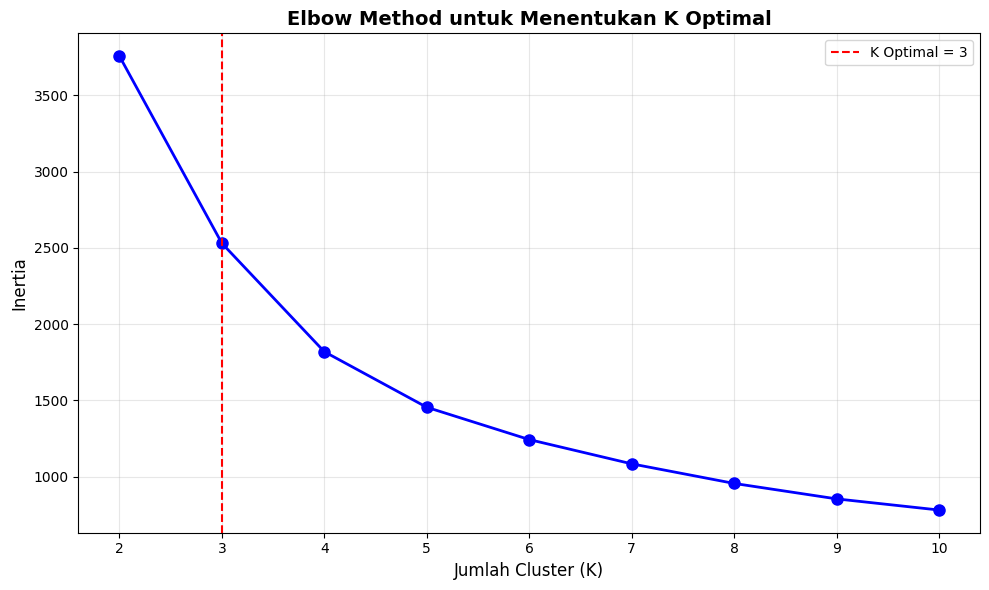

Elbow plot ditampilkan


In [9]:
plt.figure(figsize=(10, 6))
plt.plot(elbow_data['K'], elbow_data['Inertia'], 'bo-', linewidth=2, markersize=8)
plt.xlabel('Jumlah Cluster (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method untuk Menentukan K Optimal', fontsize=14, fontweight='bold')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'K Optimal = {optimal_k}')
plt.legend()
plt.tight_layout()
plt.show()

print("Elbow plot ditampilkan")


Blok 9

Interpretasinya adalah: semakin panjang batang ke kanan (mendekati 1), semakin baik rumah tersebut berada di clusternya. Jika ada batang yang pendek atau bahkan ke kiri (negatif), berarti ada rumah yang mungkin lebih cocok di cluster lain. Warna cluster berbeda-beda untuk membedakan visual setiap cluster. Garis merah putus-putus menunjukkan rata-rata silhouette score keseluruhan jika banyak batang melampaui garis ini, cluster bagus; jika banyak yang di bawah garis, cluster tersebut perlu ditinjau.

Output yang diharapkan: Beberapa subplot (tergantung K optimal, biasanya 3 atau 4), setiap subplot menampilkan silhouette plot untuk satu cluster dengan batang-batang horizontal berwarna yang menunjukkan nilai silhouette setiap rumah di cluster tersebut.

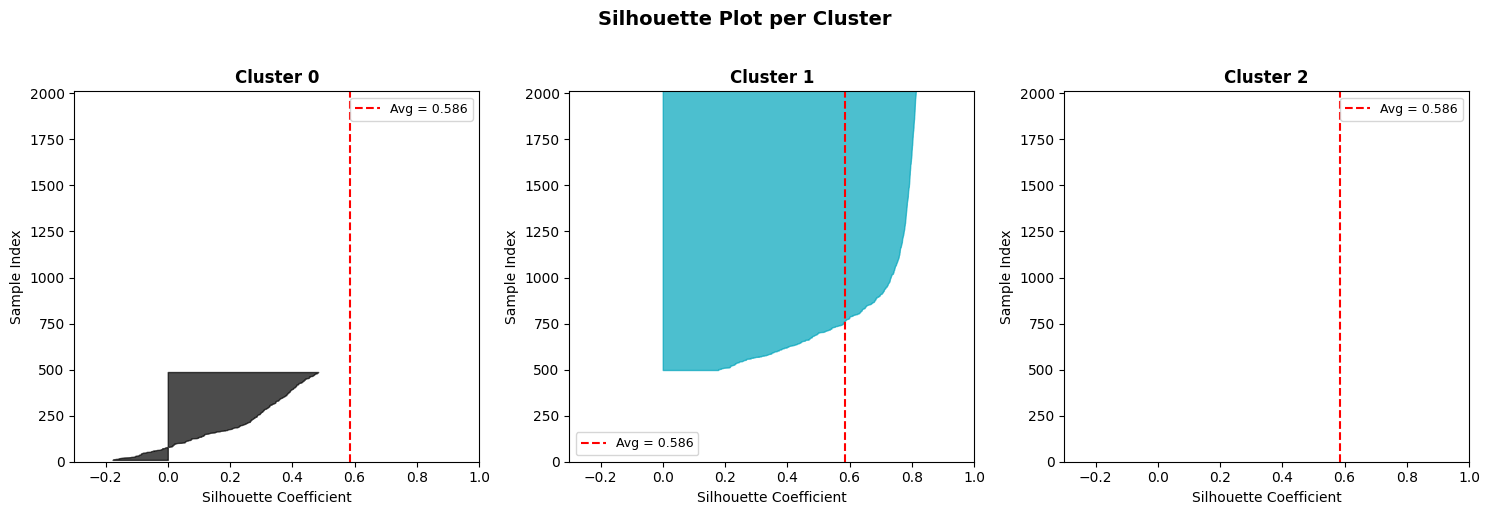

Silhouette plot per cluster ditampilkan


In [10]:
fig, axes = plt.subplots(1, optimal_k, figsize=(15, 5))

if optimal_k == 1:
    axes = [axes]

y_lower = 10

for i in range(optimal_k):
    cluster_silhouette_vals = sample_silhouette_values[df_all_houses['Cluster'] == i]
    cluster_silhouette_vals.sort()

    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / optimal_k)
    axes[i].fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)

    axes[i].set_title(f'Cluster {i}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Silhouette Coefficient', fontsize=10)
    axes[i].set_ylabel('Sample Index', fontsize=10)
    axes[i].axvline(x=silhouette_avg, color='red', linestyle='--', label=f'Avg = {silhouette_avg:.3f}')
    axes[i].set_ylim([0, len(X_scaled)])
    axes[i].set_xlim([-0.3, 1])
    axes[i].legend(loc='best', fontsize=9)

    y_lower = y_upper + 10

plt.suptitle('Silhouette Plot per Cluster', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Silhouette plot per cluster ditampilkan")


Blok 10

Output mencakup ringkasan parameter input (harga, luas bangunan yang user minta), ringkasan hasil clustering (total rumah, jumlah cluster, silhouette score keseluruhan), dan daftar Top 5 rekomendasi rumah dengan penjelasan detail untuk setiap rumah (nama, harga, luas, kamar, cluster, dan similarity score).

In [11]:
print("\n" + "="*100)
print("RINGKASAN REKOMENDASI".center(100))
print("="*100 + "\n")

print(f"Parameter Input:")
print(f"  • Harga: Rp {user_min_price:,} - Rp {user_max_price:,}")
print(f"  • Luas Bangunan: {user_lb} m²")
print(f"  • Cluster Target: {user_assigned_cluster}")
print(f"\nHasil Clustering:")
print(f"  • Total Rumah Dianalisis: {len(df_all_houses)}")
print(f"  • Jumlah Cluster: {optimal_k}")
print(f"  • Silhouette Score: {silhouette_avg:.4f}")
print(f"\n" + "-"*100)
print("TOP 5 REKOMENDASI RUMAH".center(100))
print("-"*100 + "\n")

for idx, row in top_5_recommendations.iterrows():
    print(f"#{idx}. {row['NAMA RUMAH']}")
    print(f"    Harga: Rp {row['Harga']:,} | LT: {row['LT']} m² | LB: {row['LB']} m²")
    print(f"    Kamar Tidur: {row['KT']} | Kamar Mandi: {row['KM']} | Cluster: {row['Cluster']}")
    print(f"    Similarity Score: {row['Distance']:.4f}")
    print()

print("="*100)



                                       RINGKASAN REKOMENDASI                                        

Parameter Input:
  • Harga: Rp 500,000,000 - Rp 7,000,000,000
  • Luas Bangunan: 200 m²
  • Cluster Target: 1

Hasil Clustering:
  • Total Rumah Dianalisis: 2011
  • Jumlah Cluster: 3
  • Silhouette Score: 0.5856

----------------------------------------------------------------------------------------------------
                                      TOP 5 REKOMENDASI RUMAH                                       
----------------------------------------------------------------------------------------------------

#1. Dijual rumah baru di tebet jakarta selatan
    Harga: Rp 1,980,000,000 | LT: 72 m² | LB: 164 m²
    Kamar Tidur: 4 | Kamar Mandi: 2 | Cluster: 1
    Similarity Score: 0.2177

#2. Unknown
    Harga: Rp 1,100,000,000 | LT: 90 m² | LB: 180 m²
    Kamar Tidur: 3 | Kamar Mandi: 3 | Cluster: 1
    Similarity Score: 0.2235

#3. Unknown
    Harga: Rp 1,350,000,000 | LT: 72 m² | LB